<a href="https://colab.research.google.com/github/shahzarhusain/netflix_data_analysis/blob/main/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


Business problems:
1. Overall analysis of shows vs tv shows
2. country wise analysis - Which country should focus on TV series or Movies and what genre of it
3. Shows rating distribution
4. Year wise distribution



In [42]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

# Basic exploration

In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [44]:
df.shape

(8807, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


It seems that majority of our data is in correct format except date_added and release_year. We will convert the except_date into datetime later. Now, let's see if release_year being in int64, can give us any insights.

In [46]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


We can see that the range of Release year is 1925 to 2021. As of now, median and mean for the year column does not seem to make much sense. We will explore it further later.

In [47]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [48]:
# let's try to briefly explore the categorical features in our dataset
df[['type', 'director', 'cast', 'country', 'date_added','rating', 'duration', 'listed_in']].describe()

,type,director,cast,country,date_added,rating,duration,listed_in
count,8807,6173,7982,7976,8797,8803,8804,8807
unique,2,4528,7692,748,1767,17,220,514
top,Movie,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies"
freq,6131,19,19,2818,109,3207,1793,362


As we can see that descibe function on Categorical columns gives us some interesting and quick insights about our data.
1. **Type** - We have more movies in our dataset than TV shows
2. **Director** - We have 4528 unique directors in our dataset. As of now, it seems that Rajiv Chilaka has directed the most number of movies i.e. 19.
3. **Cast** - The person to appear in movies/TV shows is David Attenborough, who seems to have acted in 19 different movies/shows.
4. **Country** - It seems that majority of content has been produced in US. however, an interestint point to note here is that the unique count of countries is coming to be **748**, this seems a bit odd as in total there are **195** countries only.
5. **Date_added** - January 1, 2020 seems to be the when most number of content is added.
6. **Rating** - Most of the content is rated as **TV-MA** i.e. for mature audience or age 17+
7. **Duration** - As we know that our dataset has movies as well as TV shows. We will have to explore further.
8. **Listed_in** - We currently seems to have 514 unique Genres combination out of which 'Dramas, International Movies' seems to be the most occuring one.

# Data Cleaning

In [49]:
# defining a function to check for the missing data in our dataset
def data_missing(x):
  data_missing = x.isnull().sum()/len(x)*100
  data_missing = data_missing[data_missing>0].sort_values()
  return data_missing

In [50]:
missing_df = data_missing(df)
missing_df

duration       0.034064
rating         0.045418
date_added     0.113546
cast           9.367549
country        9.435676
director      29.908028
dtype: float64

In [51]:
100/len(df) #percentage if 1 row has a missing data

0.011354604292040422

We can see that we have a good amount of data missing in our dataset, especially in Director, country and cast column. Additionally, we have 3, 4 and 10 rows missing for duration, rating and date_added columns respectively.

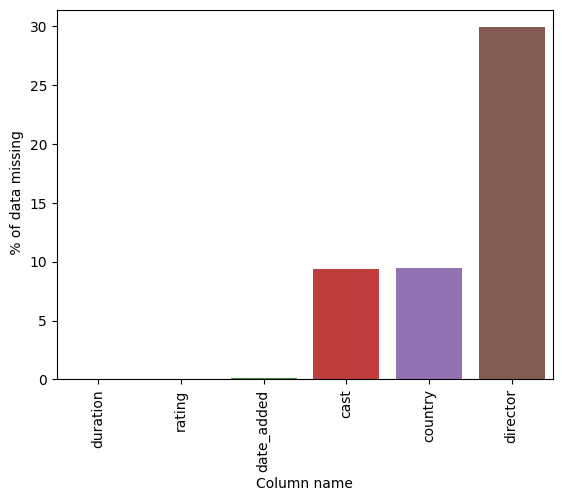

In [52]:
sns.barplot(x = missing_df.index, y = missing_df)
plt.xticks(rotation = 90)
plt.ylabel(' % of data missing')
plt.xlabel('Column name')
plt.show()

## Missing value treatment

In [53]:
# For all the rows which have missing date_added, we can see that the release year is not that old and Netflix exists.
#Hence, we will consider the movie to be added the same year and fill the values accordingly
df[df['date_added'].isnull()]['release_year']

6066    2013
6174    2018
6795    2003
6806    2003
6901    2008
7196    2010
7254    2012
7406    2016
7847    2015
8182    2015
Name: release_year, dtype: int64

In [54]:
# function to convert the release year in date
def fill_date(x):
  d = pd.to_datetime(str(x['release_year']))
  x['date_added'] = d.month_name() + ' ' + str(d.day) +',' + str(d.year)
  return x

In [55]:
#df[df['date_added'].isnull()] =
df[df['date_added'].isnull()].apply(fill_date, axis = 1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"January 1,2013",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,"January 1,2018",2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,"January 1,2003",2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,"January 1,2003",2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,"January 1,2008",2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,"January 1,2010",2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,"January 1,2012",2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 1,2016",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 1,2015",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,"January 1,2015",2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [56]:
df[df['date_added'].isnull()] = df[df['date_added'].isnull()].apply(fill_date, axis = 1)

In [57]:
# We have movies as well as TV shows in our dataset. Duration column data is not consistent and we have 3 missing rows, we will drop them
df = df.dropna(subset=['duration'])

In [58]:
# as we have only 4 rows missing for rating, we will fill them as NR - not rated
df['rating'] = df['rating'].fillna('NR')

<ipython-input-58-25b415e728f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna('NR')


In [59]:
data_missing(df)

cast         9.370741
country      9.438891
director    29.918219
dtype: float64

In [60]:
# We will fill the remaing values with 'unknown' as the missing data is in good ratio
df.fillna('Unknown', inplace= True)

<ipython-input-60-4cb1b5b1fad6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('Unknown', inplace= True)


In [61]:
data_missing(df)

Series([], dtype: float64)

## Nested data - Cast, listed_in, director

In [62]:
# as we have nested data in below columns and these are saved as a string. We will use the split function to convert them into list and then explode the rows
df['director'] = df['director'].str.split(',')
df['cast'] = df['cast'].str.split(',')
df['listed_in'] = df['listed_in'].str.split(',')

<ipython-input-62-0599d364c338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['director'] = df['director'].str.split(',')
<ipython-input-62-0599d364c338>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'] = df['cast'].str.split(',')
<ipython-input-62-0599d364c338>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [63]:
exploded_df = df.explode('director')
exploded_df.shape

(9609, 12)

In [64]:
exploded_df = exploded_df.explode('cast')
exploded_df.shape

(70809, 12)

In [65]:
#exploded_df = exploded_df.explode('listed_in')
#exploded_df.shape

Initially, we had only 8807 rows in our dataset. But post unnesting our data, we got approx 1.6L rows

In [67]:
data_missing(exploded_df)

Series([], dtype: float64)

# Data exploration & Visualisation

In [68]:
exploded_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."


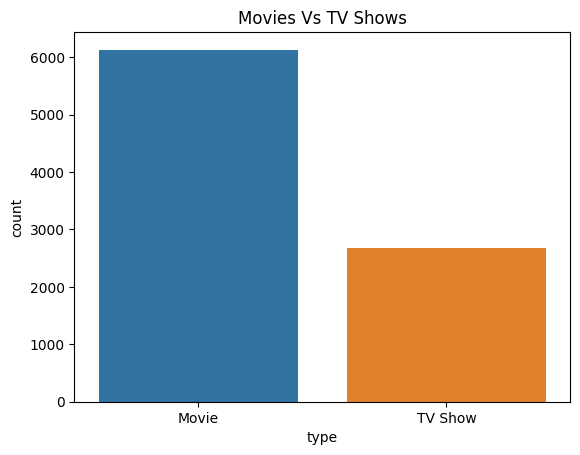

In [69]:
sns.countplot(data = df, x = 'type')  # used the original dataset as the exploded dataset will have duplicate rows for same movie/TV show
plt.title('Movies Vs TV Shows')
plt.show()

In [70]:
# Before analysing the director column, let's split the data for movies and tv shows
exploded_df[exploded_df['type'] == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...


In [71]:
exploded_df[exploded_df['type'] == 'TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,Samina Peerzada,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...","Strong-willed, middle-class Kashaf and carefre..."
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,Waseem Abbas,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...","Strong-willed, middle-class Kashaf and carefre..."
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,Javed Sheikh,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...","Strong-willed, middle-class Kashaf and carefre..."
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...","Strong-willed, middle-class Kashaf and carefre..."


In [72]:
exploded_df.shape

(70809, 12)

In [77]:
exploded_df['director'].value_counts()

Unknown                19013
Rajiv Chilaka            139
Martin Scorsese          139
Cathy Garcia-Molina      125
Steven Spielberg         121
                       ...  
 Zackary Canepari          1
Sushrut Jain               1
Ted Braun                  1
Jennie Livingston          1
Kirsten Johnson            1
Name: director, Length: 5120, dtype: int64

In [87]:
exploded_df.groupby(['director']).mean('released_year')

,release_year
director,
Aaron Moorhead,2018.500000
Aaron Woolf,2016.000000
Abbas Alibhai Burmawalla,2008.000000
Abdullah Al Noor,2018.000000
Abhinav Shiv Tiwari,2015.000000
...,...
Çagan Irmak,2005.000000
Ísold Uggadóttir,2018.000000
Óskar Thór Axelsson,2017.000000


In [88]:
exploded_listed = df.explode('listed_in')
exploded_listed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,[Mozez Singh],"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,[Mozez Singh],"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


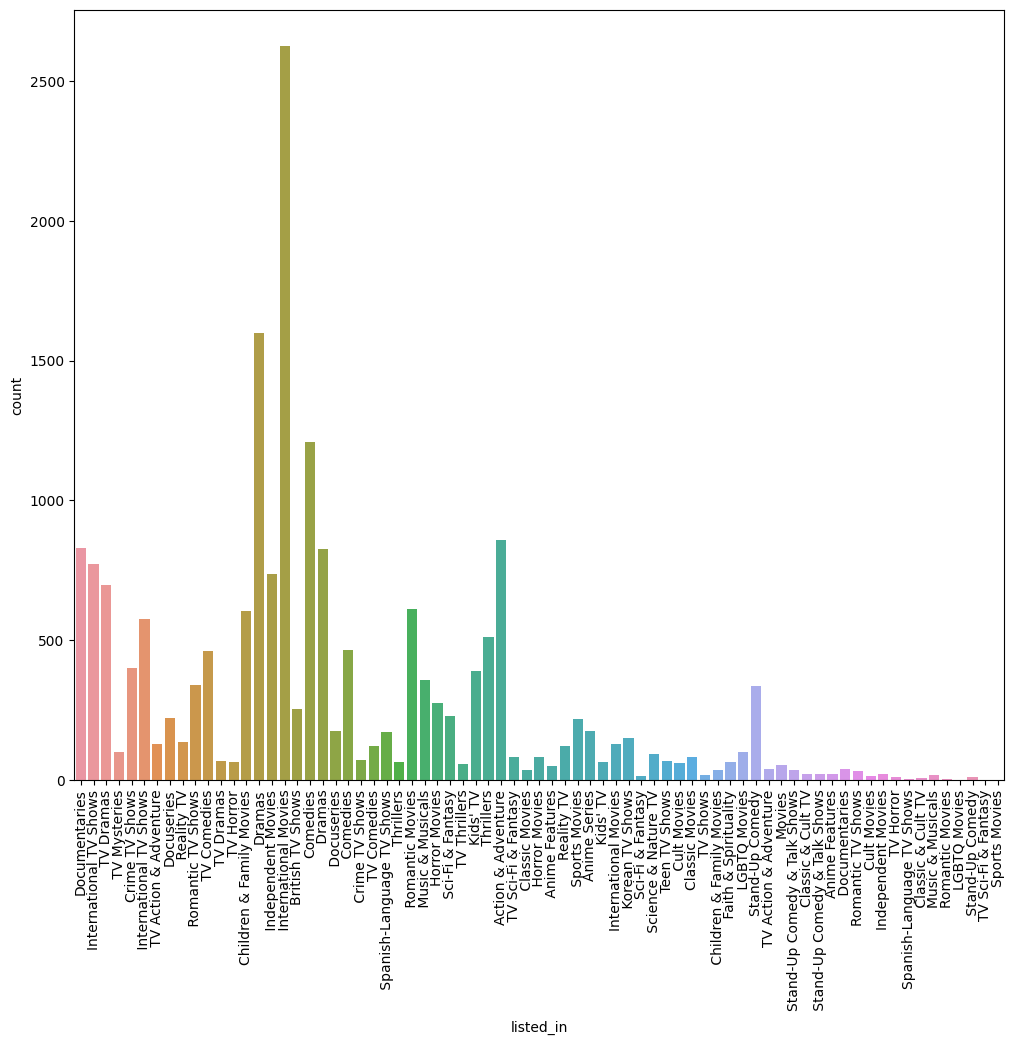

In [94]:
plt.figure(figsize = (12,10), dpi = 100)
sns.countplot(data = exploded_listed, x = 'listed_in')
plt.xticks(rotation = 90)
plt.show()

# Business Insights

1. Movies vs Tv shows -
